# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


In [2]:
df = pd.read_csv("../data/sample_glb_sum_day.csv")
# convert df['DATE'] from string to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,2018-01-01,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",11.6,24,5.5,24,...,9.9,999.9,28.0,,3.0,,0.0,G,999.9,1000
1,72565003017,2018-01-02,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",21.2,24,7.3,24,...,9.9,999.9,43.0,,3.0,,0.0,G,999.9,0
2,72565003017,2018-01-03,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.8,24,3.0,24,...,15.9,24.1,53.1,,10.9,,0.0,G,999.9,0
3,72565003017,2018-01-04,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.6,24,11.6,24,...,8.9,999.9,53.1,,17.1,,0.0,G,999.9,0
4,72565003017,2018-01-05,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",36.3,24,11.4,24,...,14.0,999.9,55.9,,23.0,,0.0,G,999.9,0


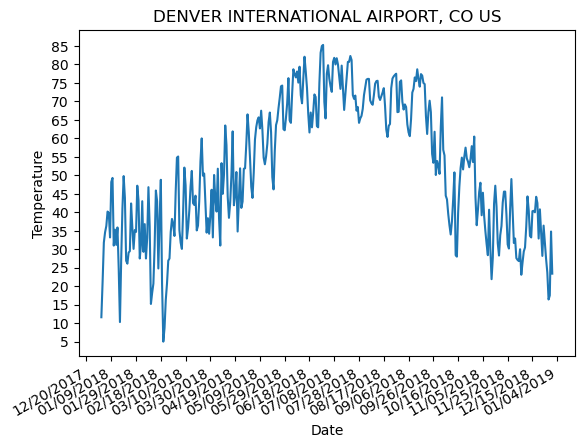

In [3]:
# Plot date and temperature of sample data

x = df[df["NAME"] == "DENVER INTERNATIONAL AIRPORT, CO US"]["DATE"]
y = df[df["NAME"] == "DENVER INTERNATIONAL AIRPORT, CO US"]["TEMP"]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title("DENVER INTERNATIONAL AIRPORT, CO US")

plt.show()

# Missing Data

In [4]:
# find na values
df.isnull().sum().sum()
df.isnull().sum()

# find rows that contain null values
df[df.isnull().any(axis=1)]


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT


# Process Raw Data using isd_display.py

In [103]:
import sys  
sys.path.insert(1, '../data')

from isd_display import display_data 
# in future, should comment out print statements in isd_display.py

df_raw = display_data("../data/2024/010010-99999-2024.gz")

# combine date and time columns, convert to datetime
df_raw['gmt'] = pd.to_datetime(df_raw['gmt'],format= '%H%M' ).dt.time
df_raw["date"] = pd.to_datetime(df_raw["date"])
df_raw["date_time"] = df_raw["date"].astype(str) + " " + df_raw["gmt"].astype(str)
df_raw["date_time"] = pd.to_datetime(df_raw["date_time"])

# format lat and long so geopython can read
df_raw["lat"] = df_raw["lat"].apply(lambda x: int(x)/1000)
df_raw["long"] = df_raw["long"].apply(lambda x: int(x)/1000)

df_raw

  var_length usaf_id   wban       date   gmt     lat     long report_type  \
0       0123  010010  99999 2024-01-01  0000  +70939  -008669       FM-12   
1       0104  010010  99999 2024-01-01  0100  +70939  -008669       FM-12   
2       0104  010010  99999 2024-01-01  0200  +70939  -008669       FM-12   
3       0104  010010  99999 2024-01-01  0300  +70939  -008669       FM-12   
4       0096  010010  99999 2024-01-01  0400  +70939  -008669       FM-12   

    elev call_letters  ... vis_flag vis_var vis_var_flag air_temp  \
0  +0010        99999  ...        9       9            9    -0070   
1  +0010        99999  ...        9       9            9    -0065   
2  +0010        99999  ...        9       9            9    -0065   
3  +0010        99999  ...        9       9            9    -0064   
4  +0010        99999  ...        9       9            9    -0070   

  air_temp_flag dew_point dew_point_flag sea_lev_press sea_levp_flag  \
0             1     -0130              1         1

,var_length,usaf_id,wban,date,gmt,lat,long,report_type,elev,call_letters,...,vis_flag,vis_var,vis_var_flag,air_temp,air_temp_flag,dew_point,dew_point_flag,sea_lev_press,sea_levp_flag,date_time
0,0123,010010,99999,2024-01-01,00:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0070,1,-0130,1,10208,1,2024-01-01 00:00:00
1,0104,010010,99999,2024-01-01,01:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0065,1,-0124,1,10204,1,2024-01-01 01:00:00
2,0104,010010,99999,2024-01-01,02:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0065,1,-0113,1,10205,1,2024-01-01 02:00:00
3,0104,010010,99999,2024-01-01,03:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0064,1,-0105,1,10202,1,2024-01-01 03:00:00
4,0096,010010,99999,2024-01-01,04:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0070,1,-0106,1,10200,1,2024-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0104,010010,99999,2024-01-22,17:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0067,1,-0094,1,09723,1,2024-01-22 17:00:00
486,0115,010010,99999,2024-01-22,18:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0059,1,-0096,1,09730,1,2024-01-22 18:00:00
487,0104,010010,99999,2024-01-22,19:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0050,1,-0086,1,09742,1,2024-01-22 19:00:00
488,0104,010010,99999,2024-01-22,20:00:00,70.939,-8.669,FM-12,+0010,99999,...,9,9,9,-0050,1,-0089,1,09749,1,2024-01-22 20:00:00


In [25]:
# convert 70939 to lattitude minutes and degrees
df_raw.columns

Index(['var_length', 'usaf_id', 'wban', 'date', 'gmt', 'lat', 'long',
       'report_type', 'elev', 'call_letters', 'qc_level', 'wind_dir',
       'wind_type', 'wind_speed', 'wind_speed_flag', 'sky_ceiling',
       'sky_ceil_flag', 'sky_ceil_determ', 'sky_cavok', 'visibility',
       'vis_flag', 'vis_var', 'vis_var_flag', 'air_temp', 'air_temp_flag',
       'dew_point', 'dew_point_flag', 'sea_lev_press', 'sea_levp_flag'],
      dtype='object')

In [7]:
from geopy.geocoders import Nominatim

# TESTING OUT GEOCODING
# Get location based on lattitude and longitude
# Initialize Nominatim API
geolocator = Nominatim(user_agent="clhsieh")
location = geolocator.geocode(str(df_raw["lat"][0])+","+str(df_raw["long"][0]))
print(location)


unique_locations_lat_long = df_raw[["lat", "long"]].drop_duplicates()
unique_loc = {}
for index, row in unique_locations_lat_long.iterrows():
    print(row["lat"], row["long"])
    print(geolocator.geocode(str(row["lat"])+","+str(row["long"])))
    unique_loc[(row["lat"], row["long"])] = geolocator.geocode(str(row["lat"])+","+str(row["long"]))

unique_loc

Jan Mayenveien, Olonkinbyen, Jan Mayen, Norge


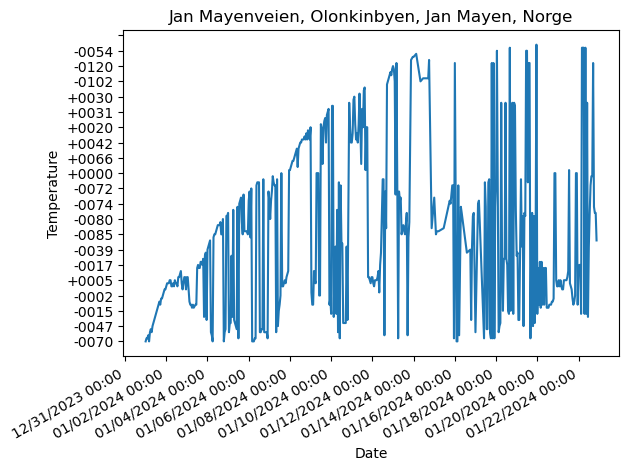

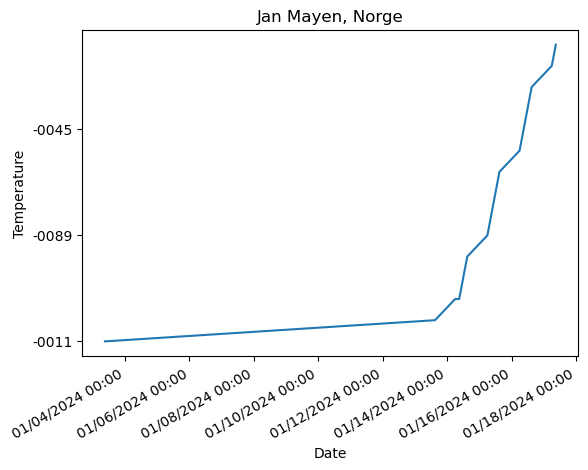

In [109]:
for key, value in unique_loc.items():
    x = df_raw[(df_raw["lat"]==float(key[0])) & (df_raw["long"]==float(key[1]))]["date_time"]
    y = df_raw[(df_raw["lat"]==float(key[0])) & (df_raw["long"]==float(key[1]))]["air_temp"]
        
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(x,y)
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(str(value))

    plt.show()


# might want a function that doesn't show so fine-grained of a time scale